# Desafio

### Exercício: Explorando o Conjunto de Dados de Vendas de carros elétricos

**Objetivo:** Utilizar a biblioteca Pandas e Matplotlib para extrair e analisar informações dos conjuntos de dados de vendas de carros elétricos.
link: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024

Desafios/etapas:
1 - importar a biblioteca pandas no Jupyter
2 - ler o arquivo .csv
3 - apresentar informações básicas do dataset
4 - limpar as linhas que possuirem dados vazios
5 - plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
6 - plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

In [13]:
#importar as bibliotecas
import pandas as pd #biblioteca para trabalhar com o arquivo .csv
import matplotlib.pyplot as plt #biblioteca para trabalhar com gráficos

In [15]:
#Ler o arquivo .csv
df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')

In [17]:
#Apresentar as 5 primeiras linhas do dataFrame
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [19]:
#Informaçõe gerais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [21]:
#verificar valores duplicados
df.duplicated().sum() #caso aparecer 0 significa que não tem linhas iguais

0

In [23]:
#verificar valores vazios por coluna
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [44]:
#Pie
df.head()
df['unit'].unique() #tomar cuidado pois 'mode' é uma palavra reservada
#A coluna unit possui valores de unidades diferentes portanto será necessários
#definir a unidada para ser analisada

#A unidade será 'vehicles' portanto é necessário criar um novo dataframe
#com apenas essas linhas
df_vehicles = df.loc[df['unit'] == 'Vehicles']

In [27]:
df_vehicles['unit'].unique() #verifico os tipos únicos da coluna 'unit'


array(['Vehicles'], dtype=object)

([<matplotlib.patches.Wedge at 0x28e44ce74d0>,
 [Text(0.2236940701869681, 1.0770148387850504, 'Cars'),
  Text(-1.059475175108288, -0.29582486935560853, 'Buses'),
  Text(0.05351735479744666, -1.0986973617586802, 'Vans'),
  Text(1.0005952318392295, -0.45695643339447445, 'Trucks')],
 [Text(0.12201494737470986, 0.5874626393373001, '43.5%'),
  Text(-0.5778955500590661, -0.1613590196485137, '21.7%'),
  Text(0.0291912844349709, -0.5992894700501892, '21.2%'),
  Text(0.5457792173668524, -0.2492489636697133, '13.6%')])

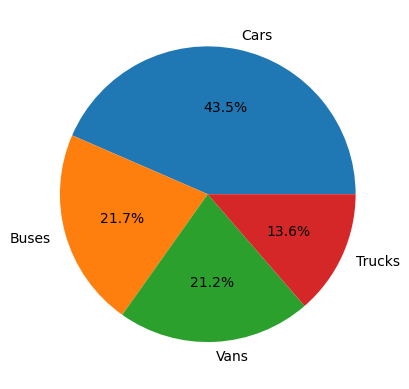

In [29]:
#gráfico pie(torta)
etiquetas = df_vehicles['mode'].unique()  #verifico os tipos únicos da coluna 'mode'
valores_etiquetas = df_vehicles['mode'].value_counts()
plt.pie(valores_etiquetas, labels=etiquetas, autopct='%1.1f%%')

In [31]:
df_vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [46]:
#Quando se agrupa o dataframe por região e somando a coluna 'value' existe uma transformação do dataframe
#para dicionário.
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()
#dictionary_vehicles.keys()
dictionary_vehicles.Australia


578832.0

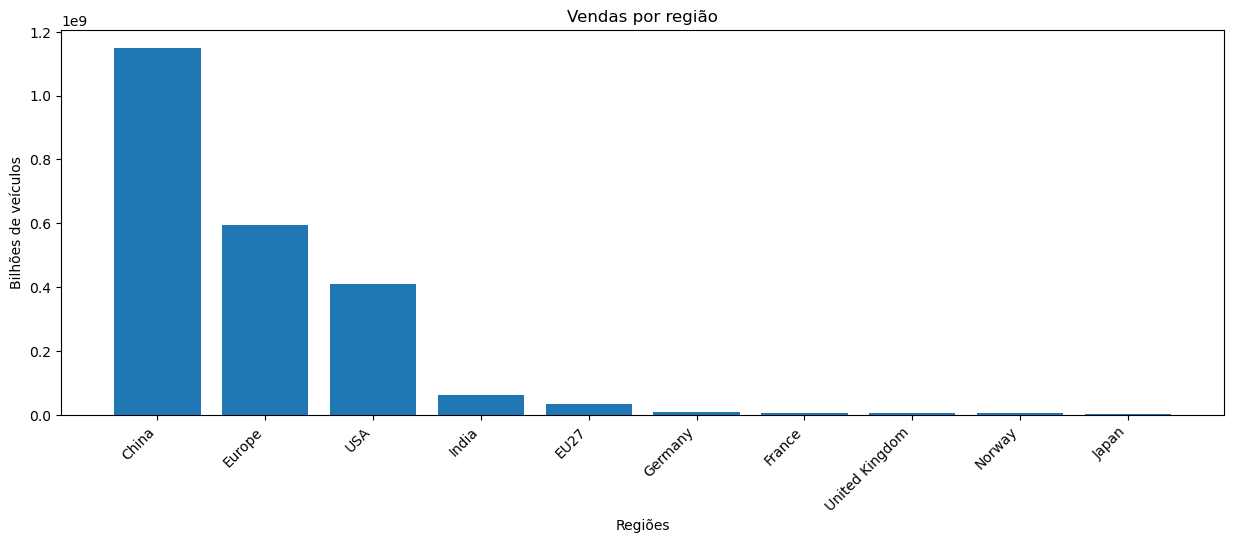

In [78]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'])

# Filtrando as regiões que não são 'World' nem 'Rest of the world', ordenando e pegando as 10 primeiras
df_top_ten = df_vehicles_region.loc[(df_vehicles_region['Regiões'] != 'World') &
                                    (df_vehicles_region['Regiões'] != 'Rest of the world')] \
                                .sort_values(by='Valores', ascending=False) \
                                .head(10)

# Preparando os dados para o gráfico
x = df_top_ten['Regiões']
y = df_top_ten['Valores']

# Configurando o gráfico de barras
plt.figure(figsize=(15, 5))
plt.title('Vendas por região')
plt.xlabel('Regiões')
plt.ylabel('Bilhões de veículos')
plt.xticks(rotation=45, ha="right")  # Corrigido para plt.xticks

# Plotando o gráfico de barras
plt.bar(x, y)
plt.show()

In [92]:
#df_vehicles['year']
#df_vehicles['year'].sort_values().unique()
#df_vehicles['powertrain']

2        2011
3        2011
4        2012
5        2012
8        2012
         ... 
12631    2035
12632    2035
12633    2035
12634    2035
12635    2035
Name: year, Length: 6842, dtype: int64

TypeError: float() argument must be a string or a real number, not 'method'

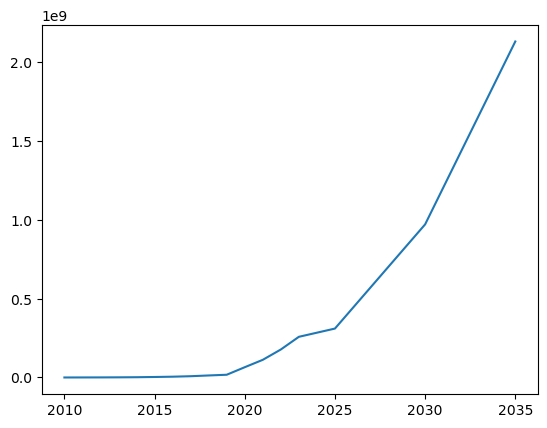

In [116]:
df_BEV = df_vehicles.loc[df_vehicles['powertrain']  == 'BEV']
df_PHEV =df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum
FCEV = df_FCEV.groupby('year')['value'].sum()
plt.plot(BEV, label = 'BEV')
plt.plot(PHEV, label = 'PHEV')
plt.plot(FCEV, label = 'FCEV')
plt.legend(title = 'powertrain')

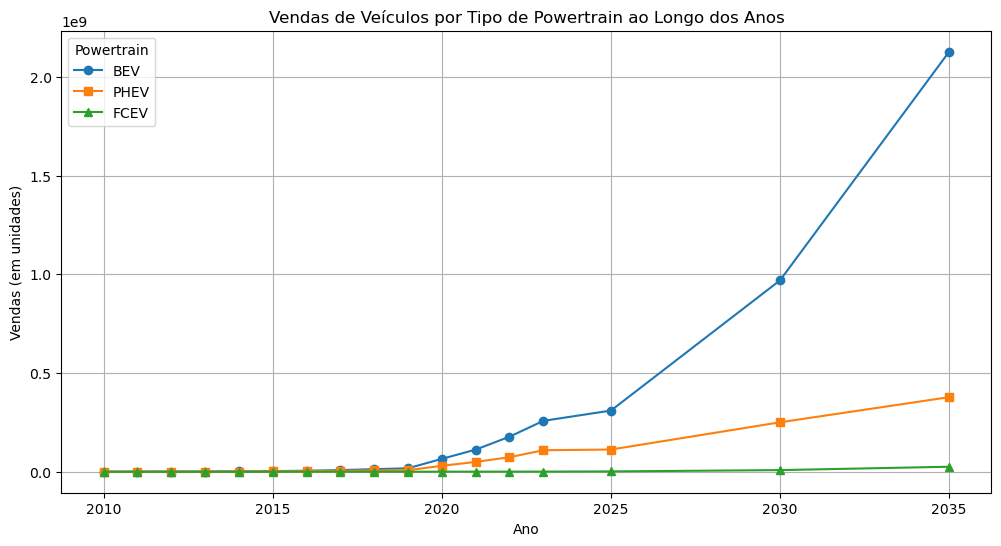

In [110]:
# Filtrando os dados para cada tipo de powertrain
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

# Agrupando os dados por ano e somando os valores
BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum()  # Corrigido para adicionar parênteses
FCEV = df_FCEV.groupby('year')['value'].sum()

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(BEV, label='BEV', marker='o')
plt.plot(PHEV, label='PHEV', marker='s')
plt.plot(FCEV, label='FCEV', marker='^')
plt.title('Vendas de Veículos por Tipo de Powertrain ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas (em unidades)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()

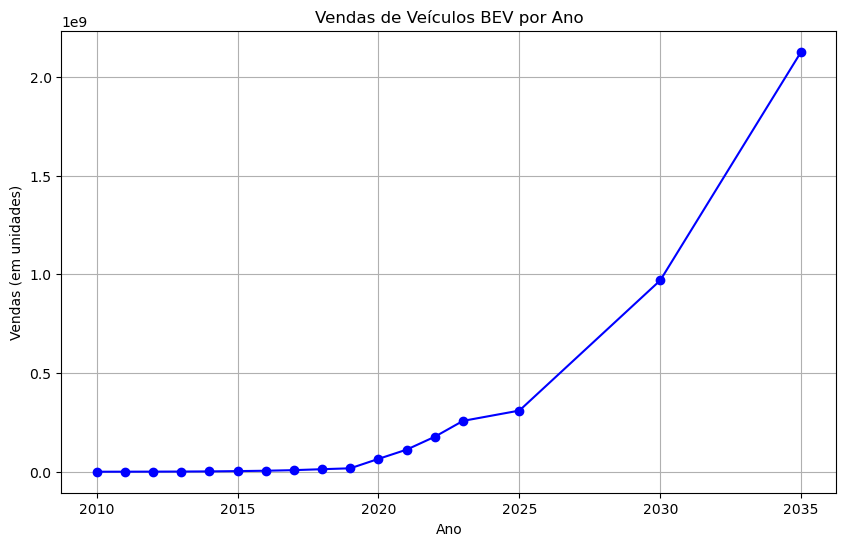

In [96]:
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

# Agrupando os dados de BEV por ano e somando os valores
BEV = df_BEV.groupby('year')['value'].sum()

# Plotando os dados de BEV ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(BEV, marker='o', linestyle='-', color='blue')
plt.title('Vendas de Veículos BEV por Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas (em unidades)')
plt.grid(True)
plt.show()

In [60]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'])

# Ordenando o DataFrame pelos valores em ordem decrescente
df_vehicles_region = df_vehicles_region.sort_values(by='Valores', ascending=False)

# Removendo a primeira linha
df_sem_primeira_linha = df_vehicles_region.iloc[1:].reset_index(drop=True)

# Exibindo o DataFrame sem a primeira linha
print(df_sem_primeira_linha)

                 Regiões       Valores
0                  China  1.148052e+09
1                 Europe  5.937754e+08
2                    USA  4.112801e+08
3      Rest of the world  3.089968e+08
4                  India  6.341878e+07
5                   EU27  3.324256e+07
6                Germany  1.020111e+07
7                 France  6.787772e+06
8         United Kingdom  6.283637e+06
9                 Norway  4.793634e+06
10                 Japan  3.603756e+06
11           Netherlands  3.488004e+06
12                 Korea  2.516838e+06
13                Sweden  2.509214e+06
14                Canada  2.416440e+06
15                 Italy  1.860044e+06
16               Belgium  1.687010e+06
17                 Spain  1.403419e+06
18           Switzerland  1.165185e+06
19               Denmark  1.102561e+06
20               Austria  8.719660e+05
21               Finland  7.427230e+05
22              Portugal  6.749960e+05
23             Australia  5.788320e+05
24                Israel 

In [52]:
#aqui estou escluindo a primeira linha

df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'])

# Ordenando o DataFrame
df_vehicles_region = df_vehicles_region.sort_values(by=['Valores'], ascending=False)

# Removendo a primeira linha
df_sem_primeira_linha = df_vehicles_region.iloc[1:]

# Exibindo o DataFrame sem a primeira linha
print(df_sem_primeira_linha)

                 Regiões       Valores
7                  China  1.148052e+09
16                Europe  5.937754e+08
48                   USA  4.112801e+08
38     Rest of the world  3.089968e+08
23                 India  6.341878e+07
14                  EU27  3.324256e+07
19               Germany  1.020111e+07
18                France  6.787772e+06
50        United Kingdom  6.283637e+06
35                Norway  4.793634e+06
27                 Japan  3.603756e+06
33           Netherlands  3.488004e+06
28                 Korea  2.516838e+06
45                Sweden  2.509214e+06
5                 Canada  2.416440e+06
26                 Italy  1.860044e+06
2                Belgium  1.687010e+06
44                 Spain  1.403419e+06
46           Switzerland  1.165185e+06
13               Denmark  1.102561e+06
1                Austria  8.719660e+05
17               Finland  7.427230e+05
37              Portugal  6.749960e+05
0              Australia  5.788320e+05
25                Israel 

In [54]:
#exclui a 1 e 2 linha


df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'])

# Ordenando o DataFrame
df_vehicles_region = df_vehicles_region.sort_values(by=['Valores'], ascending=False)

# Removendo a primeira linha
df_sem_segunda_linha = df_vehicles_region.iloc[2:]

# Exibindo o DataFrame sem a primeira linha
print(df_sem_segunda_linha)

                 Regiões       Valores
16                Europe  5.937754e+08
48                   USA  4.112801e+08
38     Rest of the world  3.089968e+08
23                 India  6.341878e+07
14                  EU27  3.324256e+07
19               Germany  1.020111e+07
18                France  6.787772e+06
50        United Kingdom  6.283637e+06
35                Norway  4.793634e+06
27                 Japan  3.603756e+06
33           Netherlands  3.488004e+06
28                 Korea  2.516838e+06
45                Sweden  2.509214e+06
5                 Canada  2.416440e+06
26                 Italy  1.860044e+06
2                Belgium  1.687010e+06
44                 Spain  1.403419e+06
46           Switzerland  1.165185e+06
13               Denmark  1.102561e+06
1                Austria  8.719660e+05
17               Finland  7.427230e+05
37              Portugal  6.749960e+05
0              Australia  5.788320e+05
25                Israel  4.821870e+05
34           New Zealand 

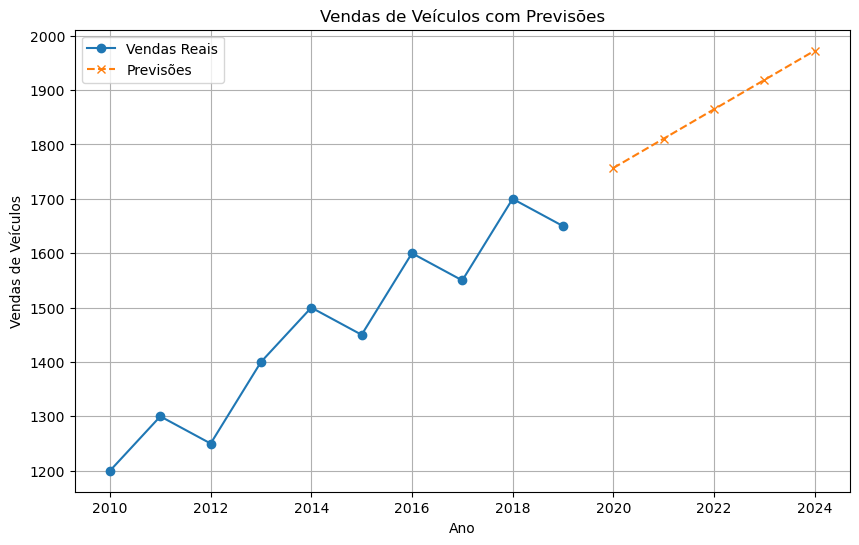

In [80]:
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Suponha que o DataFrame df_sales contenha as colunas 'Ano' e 'Vendas'
# df_sales = pd.DataFrame({'Ano': [2010, 2011, 2012, ...], 'Vendas': [1200, 1300, 1250, ...]})

# Exemplo de dados
df_sales = pd.DataFrame({
    'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Vendas': [1200, 1300, 1250, 1400, 1500, 1450, 1600, 1550, 1700, 1650]
})

# Preparar os dados para o modelo
X = df_sales['Ano'].values.reshape(-1, 1)  # Converte a coluna 'Ano' em uma matriz de uma coluna
y = df_sales['Vendas'].values

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Prever vendas para os próximos anos
anos_futuros = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
previsoes = model.predict(anos_futuros)

# Criar um DataFrame para os anos futuros e as previsões
df_previsoes = pd.DataFrame({
    'Ano': anos_futuros.flatten(),
    'Vendas': previsoes
})

# Combinar os dados reais com as previsões
df_todos_os_dados = pd.concat([df_sales, df_previsoes])

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_sales['Ano'], df_sales['Vendas'], label='Vendas Reais', marker='o')
plt.plot(df_previsoes['Ano'], df_previsoes['Vendas'], label='Previsões', linestyle='--', marker='x')
plt.title('Vendas de Veículos com Previsões')
plt.xlabel('Ano')
plt.ylabel('Vendas de Veículos')
plt.legend()
plt.grid(True)
plt.show()
"""

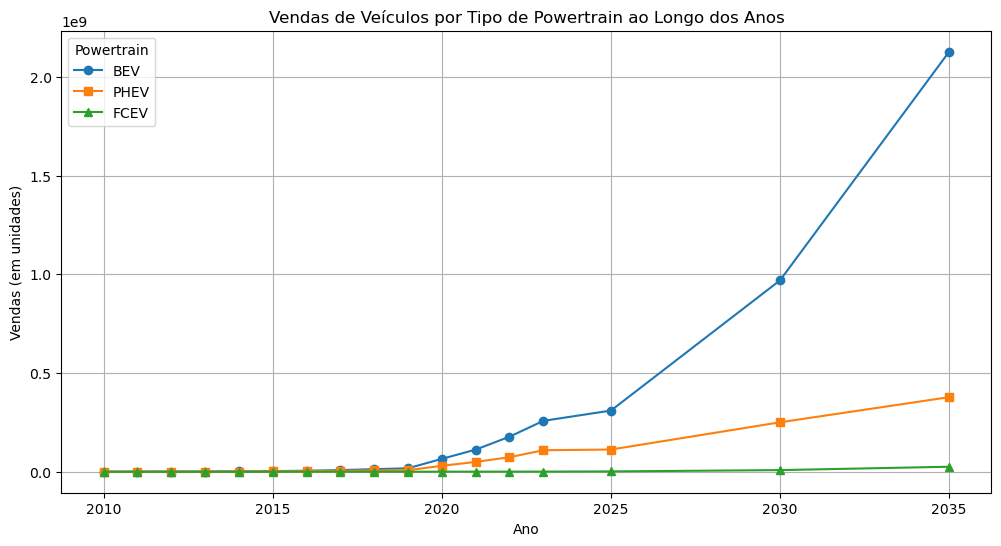

In [118]:
# Filtrando os dados para cada tipo de powertrain
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

# Agrupando os dados por ano e somando os valores
BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum()  # Corrigido com parênteses
FCEV = df_FCEV.groupby('year')['value'].sum()  # Corrigido com parênteses

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(BEV, label='BEV', marker='o')
plt.plot(PHEV, label='PHEV', marker='s')
plt.plot(FCEV, label='FCEV', marker='^')
plt.title('Tendência de vendas')
plt.xlabel('Ano')
plt.ylabel('Vendas (em unidades)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()

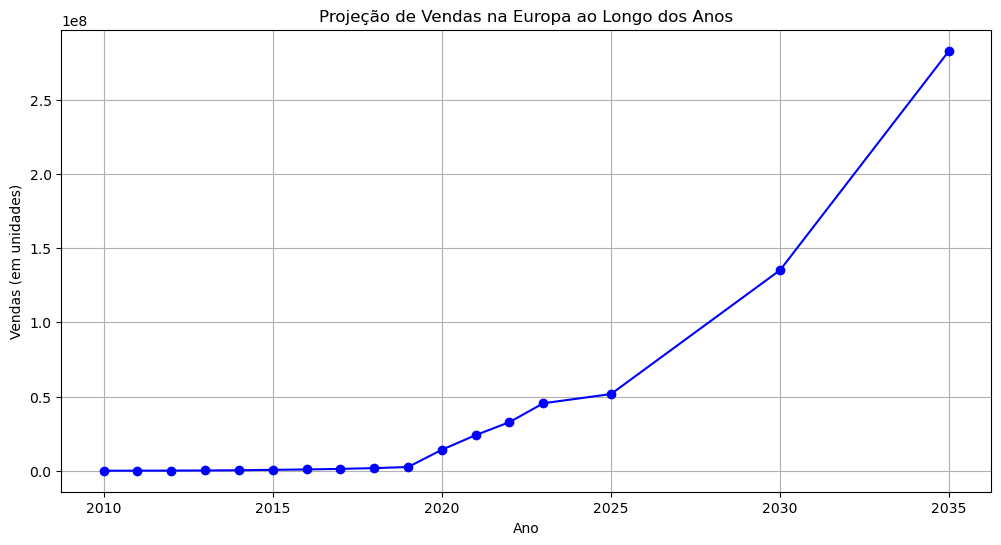

In [120]:
# Filtrando os dados para a Europa
df_Europe = df_vehicles.loc[df_vehicles['region'] == 'Europe']

# Agrupando os dados por ano e somando os valores
Europe_projection = df_Europe.groupby('year')['value'].sum()

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(Europe_projection, marker='o', linestyle='-', color='blue')
plt.title('Projeção de Vendas na Europa ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas (em unidades)')
plt.grid(True)
plt.show()

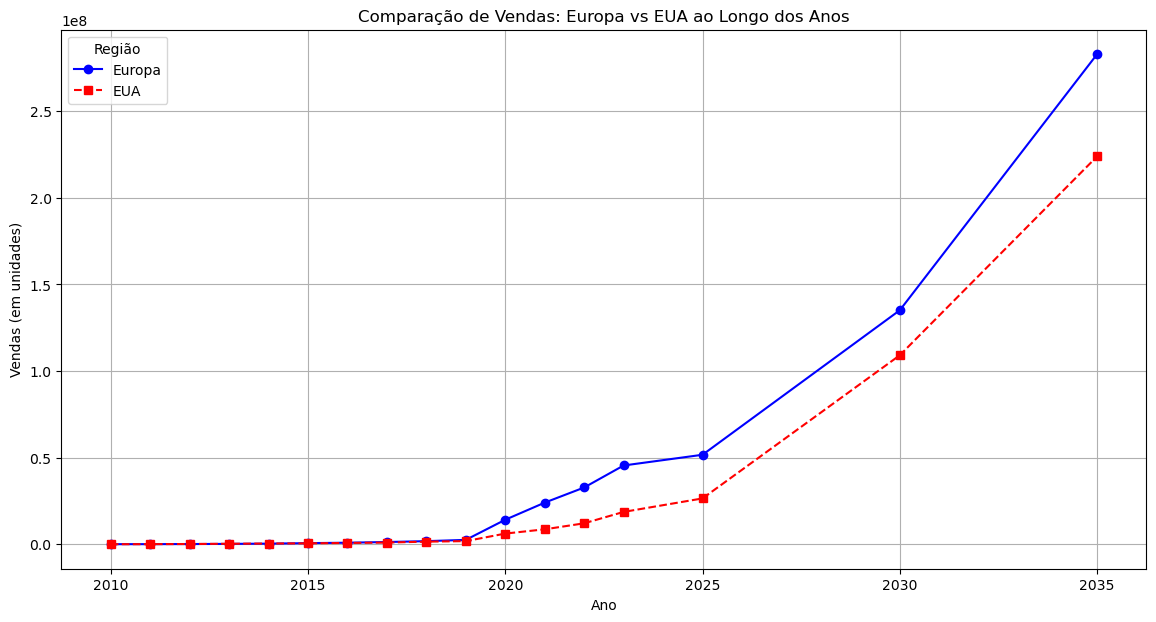

In [122]:
# Filtrando os dados para Europa e EUA
df_Europe = df_vehicles.loc[df_vehicles['region'] == 'Europe']
df_USA = df_vehicles.loc[df_vehicles['region'] == 'USA']

# Agrupando os dados por ano e somando os valores
Europe_projection = df_Europe.groupby('year')['value'].sum()
USA_projection = df_USA.groupby('year')['value'].sum()

# Plotando os dados
plt.figure(figsize=(14, 7))

# Plot para Europa
plt.plot(Europe_projection, marker='o', linestyle='-', color='blue', label='Europa')

# Plot para EUA
plt.plot(USA_projection, marker='s', linestyle='--', color='red', label='EUA')

# Adicionando título e rótulos aos eixos
plt.title('Comparação de Vendas: Europa vs EUA ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas (em unidades)')
plt.legend(title='Região')
plt.grid(True)

# Exibindo o gráfico
plt.show()